## Description
The Student Performance Dataset is a dataset designed to examine the factors influencing academic student performance. The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.

### Variables:
**Hours Studied**: The total number of hours spent studying by each student.

**Previous Scores**: The scores obtained by students in previous tests.

**Extracurricular Activities**: Whether the student participates in extracurricular activities (Yes or No).

**Sleep Hours**: The average number of hours of sleep the student had per day.

**Sample Question Papers Practiced**: The number of sample question papers the student practiced.

#### Target Variable:

**Performance Index**: A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Read dataset

In [2]:
df=pd.read_csv('Student_Performance.csv')
print(df.head())

   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


##  Encode Categorical Features

In [3]:
df['Extracurricular Activities']=df['Extracurricular Activities'].astype(str).map({'Yes':1, 'No':0})
print(df.head())

   Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0              7               99                           1            9   
1              4               82                           0            4   
2              8               51                           1            7   
3              5               52                           1            5   
4              7               75                           0            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


## Define features and target

In [4]:
X_train=df.drop('Performance Index', axis=1).values
y_train=df['Performance Index'].values

## Define number of training example and features

In [5]:
m,n=X_train.shape
print(f"Number of training example m = {m}")
print(f"Number of features n = {n}")

Number of training example m = 10000
Number of features n = 5


## Define cost function

In [6]:
def compute_cost(X,y,w,b):
    cost=0.0

    for i in range(m):
        f_wb_i=np.dot(w,X[i])+b
        cost+=(f_wb_i-y[i])**2
    
    cost/=(2*m)

    return(np.squeeze(cost))

## Compute Gradient

In [8]:
def compute_gradient(X,y,w,b):
    dj_dw=np.zeros((n,))
    dj_db=0

    for i in range(m):
        f_wb_i=np.dot(w,X[i])+b
        err=f_wb_i-y[i]

        for j in range(n):
            dj_dw[j]+=err*X[i,j]
        
        dj_db+=err
    
    dj_dw/=m
    dj_db/=m

    return dj_dw,dj_db

## Gradient descent

In [12]:
import copy

def gradient_descent(X,y,w_in,b_in,alpha,numiters):

    w=copy.deepcopy(w_in)
    b=b_in

    J_hist=[]

    for i in range(numiters):

        dj_dw,dj_db=compute_gradient(X,y,w,b)

        w=w-alpha*dj_dw
        b=b-alpha*dj_db

        if i<10000:
            J_hist.append(compute_cost(X,y,w,b))
        
        if i%(numiters/10)==0:
            print(f"Iteration {i:4d}.  Cost {np.round(J_hist[-1],2)}")

    return w,b,J_hist


## Feature Scaling
- z-score normalization

In [13]:
mu=np.mean(X_train,axis=0)
sigma=np.std(X_train,axis=0)

X_norm=(X_train-mu)/sigma

## Initialize Parameters

In [15]:
w_in=np.zeros(n)
b_in=0
# 2.587*(1e-4)
alpha=1e-2
numiters=1000

w,b,J_hist=gradient_descent(X_norm,y_train,w_in,b_in,alpha,numiters)

Iteration    0.  Cost 1675.48
Iteration  100.  Cost 226.63
Iteration  200.  Cost 32.21
Iteration  300.  Cost 6.12
Iteration  400.  Cost 2.62
Iteration  500.  Cost 2.15
Iteration  600.  Cost 2.09
Iteration  700.  Cost 2.08
Iteration  800.  Cost 2.08
Iteration  900.  Cost 2.08


## Weight and bias

In [16]:
print(f"Weight: {w} Bias: {b}")

Weight: [ 7.38645759 17.66116299  0.30649277  0.81494329  0.55577128] Bias: 55.222415876496


## Predict Student Performance

In [17]:
y_predict=np.zeros(m)

for i in range(m):
    y_predict[i]=np.dot(w,X_norm[i])+b

## Result Evaluation

In [18]:
compare_df=pd.DataFrame({
    'Actual':y_train,
    'Predicted':y_predict
})

print(compare_df[:20])

    Actual  Predicted
0     91.0  91.847875
1     65.0  63.154796
2     45.0  45.050796
3     36.0  36.549585
4     66.0  67.088338
5     61.0  59.406637
6     63.0  64.416704
7     42.0  38.274106
8     61.0  62.837965
9     69.0  69.895832
10    84.0  84.313066
11    73.0  72.472050
12    27.0  27.061281
13    33.0  33.216876
14    68.0  65.557192
15    43.0  47.459124
16    67.0  68.323563
17    70.0  71.933554
18    30.0  30.904195
19    63.0  59.932944


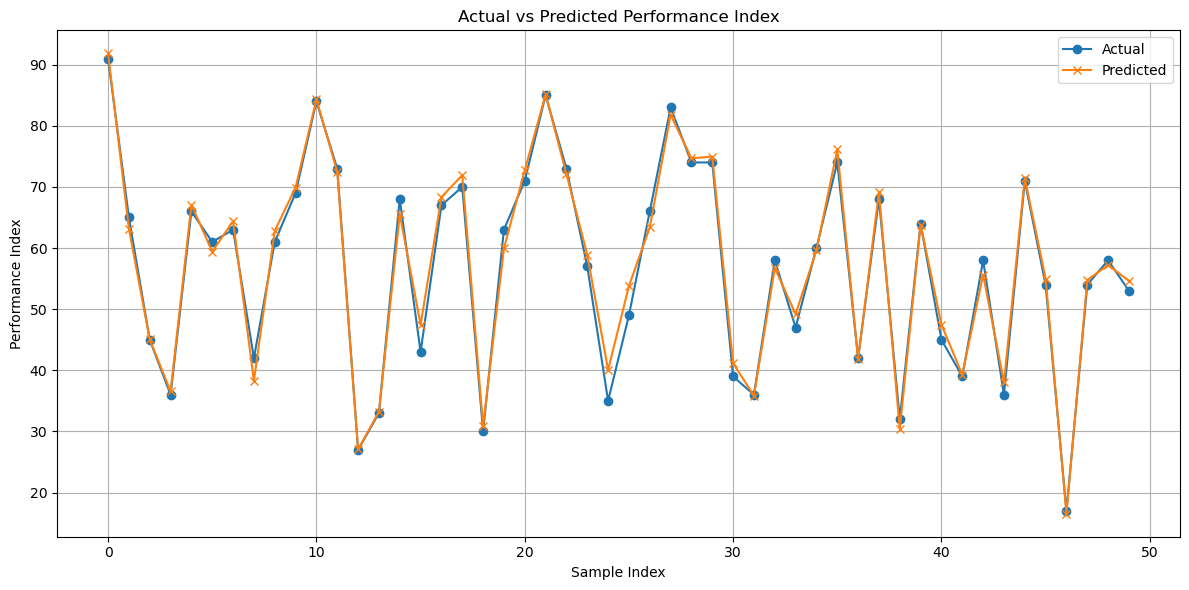

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(y_train[:50], label='Actual', marker='o')
plt.plot(y_predict[:50], label='Predicted', marker='x')
plt.title('Actual vs Predicted Performance Index')
plt.xlabel('Sample Index')
plt.ylabel('Performance Index')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Performance metrics for this model

#### R² Score (Coefficient of Determination)

% of variance explained by model (best = 1.0)

$R^2 = 1 - \frac{SSres}{SStot}$

- $SSres = \sum\limits_{i=0}^{m-1} (y^i - \hat{y}^i)^2$ = Residual Sum of Squares (error of your model)
- $SStot = \sum\limits_{i=0}^{m-1} (y^i - \bar{y})^2$ = Total Sum of Squares (error of simply using the mean)
- $y^i$ = Actual value
- $\hat{y}^i$ = Predicted value
- $\bar{y}$ = Mean of actual values
- m = Number of training example

In [20]:
y_target=np.array(y_train)
y_predict=np.array(y_predict)

ymean=np.mean(y_target)

ss_res=np.sum((y_target-y_predict)**2)
ss_tot=np.sum((y_target-ymean)**2)

r2=1-(ss_res/ss_tot)

print(r2)


0.9887523146931965


We can say the model is a excellent fit

#### RMSE: Root Mean Squared Error
$$
\text{RMSE} = \sqrt{ \frac{1}{n} \sum_{i=0}^{m-1} (y_i - \hat{y}_i)^2 }
$$

Where:
- $y^i$ = actual value  
- $\hat{y}^i$ = predicted value  
- m = number of samples

In [21]:
sum_of_sq_error=np.sum((y_target-y_predict)**2)
mean_sq_error=sum_of_sq_error/m

rmse=np.sqrt(mean_sq_error)

print(rmse)

2.0374879536295


#### MAE (Mean Absolute Error)

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right|
$$


In [22]:
sum_of_abs_error=np.sum(np.abs(y_target-y_predict))

mae=sum_of_abs_error/m

print(mae)

1.617462598236021


In [23]:
rng=max(y_target)-min(y_target)
print(f"The range width is {rng}")

The range width is 90.0


**R² = 0.989**: Indicates an excellent fit.

**RMSE = 2.03**: On average, predictions are 2.03 units off.

**MAE = 1.62**: On average, predictions are off by 1.62 units in absolute value.